# Leren: Programming assignment 2

**Student 1:**  <span style="color:red">Wim Berkelmans</span> (<span style="color:red">10793674</span>)<br>
**Student 2:** <span style="color:red">Philip Bouman</span> (<span style="color:red">10668667</span>)<br>



## Multivariate Linear Regression
1) Reading in data

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import scipy.ndimage
import math

def loadData(feature):
    # load input:
    # features: Bedrooms, Bathrooms, Size
    # target: Price
    data = np.loadtxt('HousesRegr.csv', skiprows = 1, delimiter=';');
    columns = ['MLS','Bedrooms','Bathrooms','Size','Price']
    index = columns.index(feature)
    return data[:,index]

bedroom = loadData('Bedrooms')
bathroom = loadData('Bathrooms')
size = loadData('Size')
price = loadData('Price')

# create easy format and add x_0's
def designMatrix(n):
    data = np.loadtxt('HousesRegr.csv', skiprows = 1, delimiter=';');
    m = len(data)
    X = np.ones((m,n))
    for i in range(m):
        for j in range(1,n):
            X[i, j] = data[i,j]

    return X

# vectorize predicted output
def targetVec(y):
    Y = y[:, np.newaxis] 
    return Y

def normalize(X):
    n = len(X[0])
    for i in range(1,n):
        max_value = np.amax(X[:,i])
        min_value = np.amin(X[:,i])
        mean_value = np.mean(X[:,i])
        mean_norm = np.subtract(X[:,i], mean_value)
        range_value = max_value - min_value
        X[:,i] = np.divide(mean_norm, range_value)
    return X

2) Gradient function

In [22]:
def gradient(X, Y, Thetas, theta):
    # calculate the gradient for 1 paramater: param
    # m = number of training examples
    m = len(X)
    # n = number of thetas
    n = len(Thetas)
    # loop over training examples 
    sum = 0
    for i in range(m):
        h = 0
        # loop over features
        for j in range(n):
            h += Thetas[j] * X[i][j]
            
        sum += (h - Y[i]) * X[i][theta]
    
    gradient = 1.0/m * sum
    return gradient

# X = designMatrix(4)
# Y = targetVec(price)
X = np.array([[1,2,3],[1,4,5],[1,4,3]])
Y = np.array([6,6,10])


Thetas = [0.2, 0.2, 0.2]

grad = gradient(X, Y, Thetas, 0)
print grad

-5.73333333333


3) Parameter updating

In [23]:
# Version 1
def updateThetas(X, Y, Thetas, alpha):
    # number of training examples
    m = len(X)
    # number of features
    n = len(X[0])
    
    grad = np.zeros(n)
    new_thetas = np.zeros(n)
    
    # calculate gradient for each theta
    for i in range(n):
        grad[i] = gradient(X, Y, Thetas, i)
        
    # loop over thetas
    for i in range(n):
        new_thetas[i] = Thetas[i] - alpha * grad[i]
        
    return new_thetas

# Alternate version (update parameters and gradient)
def updateThetasAlt(X, Y, Thetas, alpha):
    m = len(X)
    n = len(X[0])
    
    theta_temp = np.zeros((m,n))
    new_thetas = np.zeros(n) 
    
    # loop over training examples
    for i in range(m):

        # loop over thetas/features
        # calculate and store intermediate values for thetas (all the calculations for one training example)
        for j in range(n):
            theta_temp[i][j] = (np.sum(Thetas[:n] * X[i,:n]) - Y[i]) * X[i][j]
    
    # sum over intermediate values and apply learning rate and normalization
    for i in range(n):
        new_thetas[i] = Thetas[i] - alpha * 1.0/m * np.sum(theta_temp[0:m,i])
    
    return new_thetas


4) Cost function

In [24]:
def calcCost(Thetas, X, Y):
    m = len(X)
    n = len(Thetas)
    cost_sum = 0
    
    for i in range(n):  
        cost_sum += (np.sum(Thetas[:n] * X[i,:n]) - Y[i])**2
            
    cost = cost_sum / (2.0*m)    
    return cost

def calcCostVec(Thetas, X, Y):
    m = len(Y)
    errorSquared = (np.dot(X, Thetas) - Y)**2
    
    # sum over errorSquared by multiplying with a rowvector of ones
    ones = np.ones(m)
    cost = np.dot(ones.T, errorSquared)/(2.0*m)
    return cost

5) Main, optimization learning rate and iterations

In [25]:
def multiple(X, Y, Thetas, alpha, n_iter):
    while n_iter > 0:
        Thetas = updateThetas(X, Y, Thetas, alpha)
        n_iter -= 1
    return Thetas

# alternative version; faster
def multipleAlt(X, Y, Thetas, alpha, n_iter):
    while n_iter > 0:
        Thetas = updateThetasAlt(X, Y, Thetas, alpha)
        n_iter -= 1
    return Thetas

# vectorized version
def regressionVec(X, Y):
    
    # apply normal equation
    norm = np.dot(np.dot(linalg.inv(np.dot(X.T, X)), X.T), Y)
    return norm

# test set as input
X = np.array([[1,2,3],[1,4,5],[1,4,3]])
Y = np.array([6,6,10])
Thetas = [0.2,0.2,0.2]
print "Input test data from written assignment:"

final_thetas = multiple(X, Y, Thetas, 0.01, 2)
print "Final values of parameters: ", final_thetas
print "Final cost: ", calcCost(final_thetas, X, Y)
print "\n"
print "Written assignment vectorized"
final_thetas = regressionVec(X, Y)
print "Final values of parameters: ", final_thetas
print "Final cost: ", calcCostVec(final_thetas, X, Y)
print "\n"

# input is HousesRegr.csv
X = designMatrix(4)
X = normalize(X)
# print X
Y = targetVec(price)
# print Y
Thetas = [100000,100000,100000,100000]

# alpha = 0.00000001
# iters = 200
# print "Input is HousesRegr.csv, alpha = ", alpha, " with ", iters, "iterations."
# final_thetas = multiple(X, Y, Thetas, alpha, iters)
# print "Final values of parameters: ", final_thetas
# print "Final cost: ", calcCost(final_thetas, X, Y)

# alpha = 0.01
# iters = 200
# print "Input is HousesRegr.csv, alpha = ", alpha, " with ", iters, "iterations."
# final_thetas = multiple(X, Y, Thetas, alpha, iters)
# print "Final values of parameters: ", final_thetas
# print "Final cost: ", calcCost(final_thetas, X, Y)

# alpha = 0.01
# iters = 2000
# print "Input is HousesRegr.csv, alpha = ", alpha, " with ", iters, "iterations."
# final_thetas = multiple(X, Y, Thetas, alpha, iters)
# print "Final values of parameters: ", final_thetas
# print "Final cost: ", calcCost(final_thetas, X, Y)

# alpha = 0.1
# iters = 200
# print "Input is HousesRegr.csv, alpha = ", alpha, " with ", iters, "iterations."
# final_thetas = multiple(X, Y, Thetas, alpha, iters)
# print "Final values of parameters: ", final_thetas
# print "Final cost: ", calcCost(final_thetas, X, Y)

alpha = 1
iters = 200
print "Input is HousesRegr.csv, alpha = ", alpha, " with ", iters, "iterations."
final_thetas = multiple(X, Y, Thetas, alpha, iters)
print "Final values of parameters: ", final_thetas
print "Final cost: ", calcCost(final_thetas, X, Y)

print "\n"
print "Input is HousesRegr.csv, Vectorized"
final_thetas = regressionVec(X, Y)
print "Final values of parameters: ", final_thetas
print "Final cost: ", calcCostVec(final_thetas, X, Y)


Input test data from written assignment:
Final values of parameters:  [ 0.30023111  0.54391111  0.54176   ]
Final cost:  7.39688291787


Written assignment vectorized
Final values of parameters:  [ 8.  2. -2.]
Final cost:  5.37740183726e-29


Input is HousesRegr.csv, alpha =  1  with  200 iterations.
Final values of parameters:  [  383329.11011524  -269334.98576148   620216.44819484  1546227.67924897]
Final cost:  [ 86901044.21568717]


Input is HousesRegr.csv, Vectorized
Final values of parameters:  [[  383329.11011524]
 [-1005440.72589458]
 [  459811.58275449]
 [ 2068136.71838695]]
Final cost:  [  3.17053703e+10]


**Discussion:**

The data from HousesRegr.csv are normalized.
A bigger alpha improves the speed of convergence.

-----------------------------------

## Polynomial Regression
1) Extension to polynomial regression

2) Cost function

3) Optimization learning rate and iterations

In [26]:
X = designMatrix(4)
X = np.repeat(X, 2, axis=1)
X = np.delete(X, 1, 1)
m = len(X)
for i in range(m):
    for j in range(3):
        X[i,2*j + 2] = X[i,2*j + 2]**2
        
X = normalize(X)
Y = targetVec(price)
Thetas = [100000,100000,100000,100000,100000,100000,100000]

alpha = 1
iters = 200
print "Input is HousesRegr.csv, alpha = ", alpha, " with ", iters, "iterations."
final_thetas = multiple(X, Y, Thetas, alpha, iters)
print "Final values of parameters: ", final_thetas
print "Final cost: ", calcCost(final_thetas, X, Y)


Input is HousesRegr.csv, alpha =  1  with  200 iterations.
Final values of parameters:  [  383329.11011524  -286100.04351846  -265236.37361688   435657.51781904
   211900.97704529  1088886.92732143   843084.29408607]
Final cost:  [ 97929111.38177693]


**Discussion:**

Adding squares of the input variables does not improve the cost.

-----------------------------------

## Logistic Regression
1) Reading in data

In [27]:
def readData():
    data = np.loadtxt('digits123.csv', delimiter=',');
    return data

2) Gradient calculating and parameter updating

In [28]:
# hypothesis function for logistic regression
def hypothesis(thetas, x):
    return 1.0 / (1.0 + np.exp(-np.dot(thetas, x)))


# gradient and parameter updating
def updateLog(X, Y, Thetas, alpha):
    m = len(X)
    n = len(Thetas)
    
    new_thetas = np.zeros(n) 
    theta_temp = np.zeros(m)
    
        
    # loop over training examples
    for i in range(m):

        # loop over thetas/features
        for j in range(n):
            theta_temp[i] = 1.0 / (1.0 + np.exp(-np.sum(Thetas[:n] * X[i,:n]))) - Y[i]
        
    new_thetas = Thetas - alpha * 1/m * np.dot(X.T,theta_temp[:, np.newaxis])
        
    return new_thetas[:,0]

3) Cost function

In [29]:
# cost function for logistic regression
def calcCostLog(thetas, X, Y):
    m = len(X)
    cost_sum = 0.0
    
    for i in range(m):
        if Y[i] > 0:
            cost_sum += math.log(hypothesis(thetas,X[i]))
        else:
            cost_sum += math.log(1 - hypothesis(thetas,X[i]))
    return -(cost_sum/m)

4) Pairwise comparison of classes

In [30]:
# function to categorize training examples
def splitClasses(thetas, y):
    m = len(y)
    n = len(thetas)
    classes = list(set(y))
    n_class = len(classes)
    if n_class <= 2 and 0 in classes:
        return thetas, y
    else:
        Y = np.zeros((m,n_class))
        Thetas = np.zeros((n_class, n))
        for i in range(n_class):
            for j in range(m):
                if y[j] == classes[i]:
                    Y[j][i] = 1
                else:
                    Y[j][i] = 0
            Thetas[i] = thetas
        return Thetas[0], Y

5) Optimization learning rate and iterations

final cost:  0.688462814016
final thetas: [ 0.00990107 -0.0087486   0.00612999]


<function matplotlib.pyplot.show>

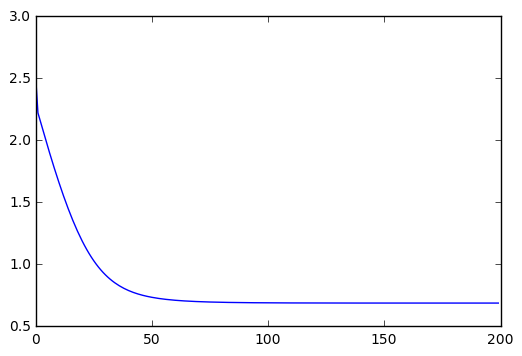

In [31]:
def regressionLog(X, y, alpha, n_iter, thetas):
    cost = []
    # for number of iterations
    while n_iter > 0:
        # calculate cost
        cost.append(calcCostLog(thetas, X, y))
        # update values for theta
        new_thetas = updateLog(X, y, thetas, alpha)
        thetas = new_thetas        
        n_iter -= 1
    
    # split classes
    new_thetas, new_y = splitClasses(thetas, y)
    
    return new_thetas, cost

# input is data from written assignment
X = np.array([[1,5,3],[1,5,5],[1,3,3],[1,2,4]])
Y = np.array([0,0,1,1])
thetas = np.array([0.5,0.5,0.5])

new_thetas, cost = regressionLog(X, Y, 0.03, 200, thetas)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.plot(cost)
plt.show

final cost:  0.0242034196431
final thetas: [ 0.01143787  0.0113353   0.01141036  0.0122323   0.01278453  0.0126368
  0.01193026  0.01139328  0.01133567  0.01133642  0.01179844  0.01266348
  0.01236357  0.01253657  0.01234471  0.01149416  0.01133642  0.01133588
  0.01163926  0.01185498  0.01171109  0.01255545  0.01217563  0.01140709
  0.0113353   0.01133531  0.01138579  0.01149936  0.01211545  0.0127255
  0.01187077  0.01134946  0.0113353   0.0113353   0.01134225  0.01145236
  0.01202219  0.0125199   0.01218573  0.01148744  0.0113353   0.0113353
  0.01138388  0.01161282  0.01180529  0.01188984  0.01223733  0.0117989
  0.01133586  0.01133586  0.01144195  0.01219753  0.01224607  0.01231184
  0.01258499  0.01198118  0.01136397  0.01133549  0.01140107  0.0123099
  0.01280999  0.01273861  0.01232831  0.01170186  0.01140553]


<function matplotlib.pyplot.show>

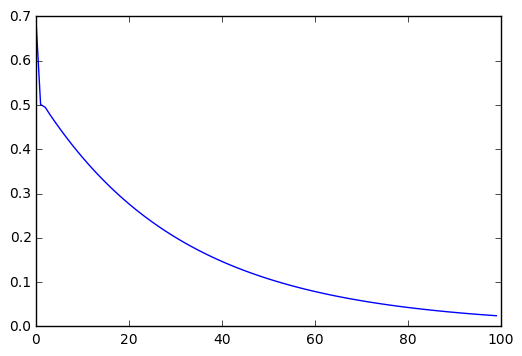

In [34]:
# input is digits123.csv
X = readData()
Y = X[:,-1] # Y target values, last column of X
X = np.delete(X, -1, 1) # remove target values
X = np.insert(X, 0, 1, axis=1) # insert first column with ones
thetas = np.zeros(len(X[0]))

new_thetas, cost = regressionLog(X, Y, 0.0001, 100, thetas)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.plot(cost)
plt.show

**Discussion:**

[You discussion comes here]

-----------------------------------

We weren't able to finish the implementation with regard to the pairwise comparison, so we lack those data.
Looking at the plot of the cost function, the logistic regression seems to work fine (the cost is converging). 